# Example of optimizing a convex function

In [1]:
from mango.tuner import Tuner

In [2]:
def optimize_convex():
    param_dict = {
        'x': range(-100, 10),
        'y': range(-10, 20),
    }

    
    def objfunc(args_list):
        results = []
        for hyper_par in args_list:
            x = hyper_par['x']
            y = hyper_par['y']
            result = -(x**2 + y**2)
            results.append(result)
        return results
    
    tuner = Tuner(param_dict, objfunc)
    print('Tuner Configuration')
    print(tuner.getConf())
    results = tuner.maximize()

    return results

In [3]:
# Actual Opt Values
x_opt = 0
y_opt = 0

In [4]:
results = optimize_convex()

Tuner Configuration
{'param_dict': {'x': range(-100, 10), 'y': range(-10, 20)}, 'userObjective': <function optimize_convex.<locals>.objfunc at 0x1a1ecbd378>, 'domain_size': 5000, 'initial_random': 1, 'num_iteration': 20, 'objective': 'maximize', 'batch_size': 1}


In [5]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x': 0, 'y': 0}
best objective: 0


In [6]:
print("Real x_opt and y_opt are:",x_opt,y_opt)

Real x_opt and y_opt are: 0 0


# Actual variation in the objective

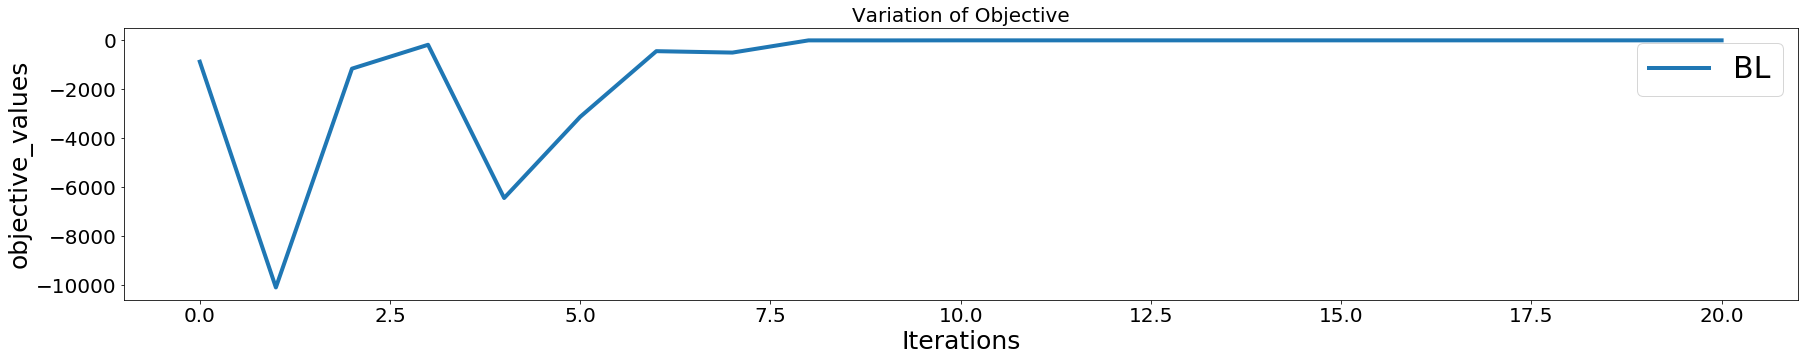

In [8]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation in the max objective

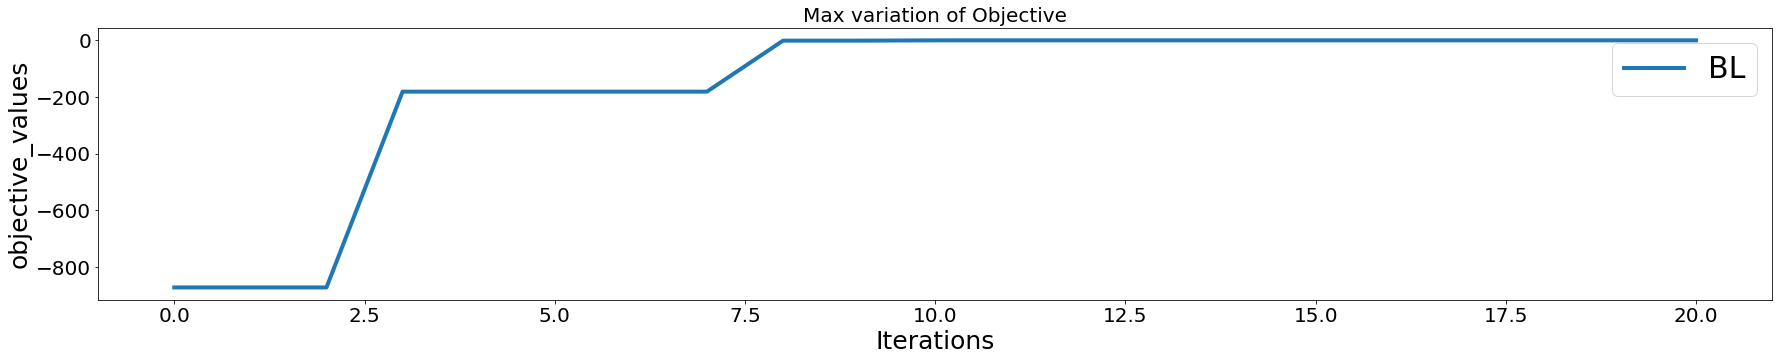

In [9]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()